In [103]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # импортируем библиотеку

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from datetime import datetime, date, time
from sklearn import preprocessing
from sklearn import utils

In [118]:

df_player=pd.read_csv('new_player.csv')
df_match=pd.read_csv('new_match.csv')
df_team=pd.read_csv('new_team.csv')

df_match['date'] = pd.to_datetime(df_match['date'])
df_match.dropna()

df_match['result_home_team_api_id'] = df_match.apply(lambda x: 1 if x['home_team_goal'] > x['away_team_goal'] else (0 if x['home_team_goal'] < x['away_team_goal'] else 0.5), axis=1)
df_match['result_away_team_api_id'] = df_match.apply(lambda x: 1 if x['home_team_goal'] < x['away_team_goal'] else (0 if x['home_team_goal'] > x['away_team_goal'] else 0.5), axis=1)
df_match['result_home_team_api_id']=df_match['result_home_team_api_id'].astype('int')
df_match['result_away_team_api_id']=df_match['result_away_team_api_id'].astype('int')


df_match.isna().sum()


league_id                  0
name                       0
season                     0
stage                      0
date                       0
match_api_id               0
home_team_api_id           0
home_team                  0
away_team_api_id           0
away_team                  0
home_team_goal             0
away_team_goal             0
home_player_1              0
home_player_2              0
home_player_3              0
home_player_4              0
home_player_5              0
home_player_6              0
home_player_7              0
home_player_8              0
home_player_9              0
home_player_10             0
home_player_11             0
away_player_1              0
away_player_2              0
away_player_3              0
away_player_4              0
away_player_5              0
away_player_6              0
away_player_7              0
away_player_8              0
away_player_9              0
away_player_10             0
away_player_11             0
result_home_te

In [113]:
df_team_c=df_team.filter(['team_api_id','team_long_name'],axis=1)
df_player_c=df_player.filter(['player_fifa_api_id','overall_rating',''],axis=1)
df_player_c['player_fifa_api_id']=df_player_c['player_fifa_api_id'].astype('float')
df_player_c['player_fifa_api_id']=df_player_c['player_fifa_api_id'].astype('float')
df_player_c
df_match

,league_id,name,season,stage,date,match_api_id,home_team_api_id,home_team,away_team_api_id,away_team,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result_home_team_api_id,result_away_team_api_id
0,1,Belgium Jupiler League,2015/2016,1,2015-07-25,1979833,8571,KV Kortrijk,9985,Standard de Liège,...,74,75,70,66,74,67,71,73,1,0
1,1,Belgium Jupiler League,2015/2016,1,2015-07-25,1979835,8573,KV Oostende,8203,KV Mechelen,...,68,67,67,74,69,67,70,69,1,0
2,1,Belgium Jupiler League,2015/2016,1,2015-07-25,1979836,10000,SV Zulte-Waregem,9994,Sporting Lokeren,...,70,64,73,66,72,69,63,65,1,0
3,1,Belgium Jupiler League,2015/2016,1,2015-07-26,1979837,10001,KVC Westerlo,9991,KAA Gent,...,73,73,74,74,78,71,76,70,0,0
4,1,Belgium Jupiler League,2015/2016,1,2015-07-26,1979838,8635,RSC Anderlecht,8475,Waasland-Beveren,...,64,66,64,66,69,72,69,67,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,24558,Switzerland Super League,2015/2016,8,2015-09-13,1992089,10243,FC Zürich,10191,FC Thun,...,57,61,63,64,64,65,65,67,0,0
2736,24558,Switzerland Super League,2015/2016,9,2015-09-22,1992091,10190,FC St. Gallen,10191,FC Thun,...,57,65,63,64,64,65,61,67,1,0
2737,24558,Switzerland Super League,2015/2016,9,2015-09-23,1992092,9824,FC Vaduz,10199,FC Luzern,...,66,68,57,63,67,67,68,70,0,1
2738,24558,Switzerland Super League,2015/2016,9,2015-09-23,1992093,9956,Grasshopper Club Zürich,10179,FC Sion,...,73,65,64,68,67,70,67,73,1,0


In [119]:
#сила команд на каждый матч
df_match['ht_strength']= df_match['home_player_1']+df_match['home_player_2']+df_match['home_player_3']+df_match['home_player_4']+df_match['home_player_5']+df_match['home_player_6']+df_match['home_player_7']+df_match['home_player_8']+df_match['home_player_9']+df_match['home_player_10']+df_match['home_player_11']
df_match['at_strength']= df_match['away_player_1']+df_match['away_player_2']+df_match['away_player_3']+df_match['away_player_4']+df_match['away_player_5']+df_match['away_player_6']+df_match['away_player_7']+df_match['away_player_8']+df_match['away_player_9']+df_match['away_player_10']+df_match['away_player_11']
df=df_match.filter(['date','home_team','away_team','ht_strength','at_strength','home_team_goal','away_team_goal','result_home_team_api_id','result_away_team_api_id'])


In [120]:
#среднее кол-во голов как доп метрики
df['par1'] = (df['home_team_goal'].groupby(df['home_team']).transform('mean')).astype('int') #average home goals in favor
df['par2'] = (df['home_team_goal'].groupby(df['away_team']).transform('mean')).astype('int') #average home goals against
df['par3'] = (df['away_team_goal'].groupby(df['home_team']).transform('mean')).astype('int') #average away goals against
df['par4'] = (df['away_team_goal'].groupby(df['away_team']).transform('mean')).astype('int') #average away goals in favor


In [116]:
#анализ для home_team

log_reg = LogisticRegression()
X = df[['ht_strength','par1','par2','par3','par4']]
Y=df['result_home_team_api_id']
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)

test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

log_reg.fit(X_train, Y_train)
Y_predicted = log_reg.predict(X_test)

print('acc:%.2f'% accuracy_score(Y_test,Y_predicted))
print('prec:%.2f'% precision_score(Y_test,Y_predicted)) 
print('rec:%.2f' % recall_score(Y_test,Y_predicted)) 



acc:0.66
prec:0.66
rec:0.52


In [71]:
min_max_scaler = MinMaxScaler() # инициализируем экземпляр класса
x = df['home_team_goal'].values.reshape(-1, 1) # приводим к двумерному массиву
min_max_scaler.fit(x) # определяем параметры
x_minmax_scaled = min_max_scaler.transform(x) # нормализуем данные и создаем новую переменную
df['balance']=


In [121]:
#анализ для away_team

log_reg = LogisticRegression()
X = df[['at_strength','par1','par2','par3','par4']]
Y=df['result_away_team_api_id']
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(Y)

test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

log_reg.fit(X_train, Y_train)
Y_predicted = log_reg.predict(X_test)

print('acc:%.2f'% accuracy_score(Y_test,Y_predicted))
print('prec:%.2f'% precision_score(Y_test,Y_predicted)) 
print('rec:%.2f' % recall_score(Y_test,Y_predicted)) 



acc:0.74
prec:0.64
rec:0.29


/var/folders/sb/gwx20jqj1_jdlys6x6f7tq8c0000gn/T/ipykernel_9798/1021094766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_player.corr())


<Axes: >

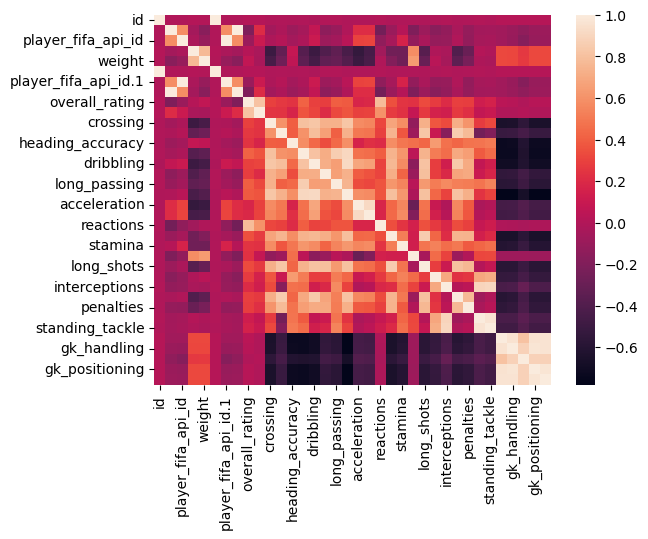

In [64]:
# в следующей модели можно взять все характеристики игроков и процент выигрышей

sns.heatmap(df_player.corr())
